# Simple MNIST with custom input pipeline


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.9131
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1095 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9726
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9758


[0.07518520206212997, 0.9757999777793884]

**Pre-processing new image, import as "test_image.jpg"**


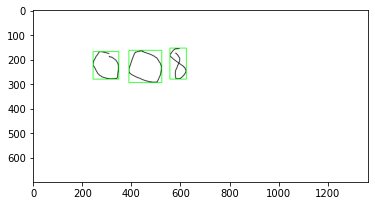

3

In [ ]:
image = cv2.imread('./digits.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)
len(preprocessed_digits)

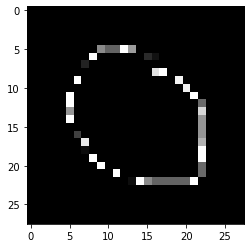



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


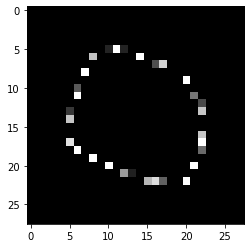



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


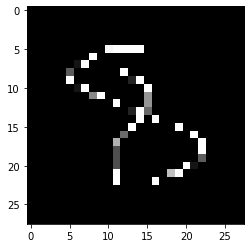



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5843871e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999988e-01 0.0000000e+00]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  

    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
